# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.SimulationResult()
simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
alive at Source: 10000000
alive at Lightbox: 8449525
alive at Diffuser: 6383802
alive at Outbound: 225
alive at Inbound: 225
alive at Camera: 92
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
alive at Source: 20000000
alive at Lightbox: 16898031
alive at Diffuser: 12765492
alive at Outbound: 461
alive at Inbound: 461
alive at Camera: 196
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
alive at Source: 30000000
alive at Lightbox: 25346067
alive at Diffuser: 19146809
alive at Outbound: 689
alive at Inbound: 689
alive at Camera: 282
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
alive at Source: 40

alive at Diffuser: 185053025
alive at Outbound: 6848
alive at Inbound: 6848
alive at Camera: 3067
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
alive at Source: 300000000
alive at Lightbox: 253492025
alive at Diffuser: 191436389
alive at Outbound: 7102
alive at Inbound: 7102
alive at Camera: 3170
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
alive at Source: 310000000
alive at Lightbox: 261943006
alive at Diffuser: 197817241
alive at Outbound: 7323
alive at Inbound: 7323
alive at Camera: 3263
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
alive at Source: 320000000
alive at Lightbox: 270393780
alive at Diffuser: 204199062
alive at Outbound: 7554
alive at Inbound: 7554
alive at Camera: 3363
photon batch energy joules: 1.790e-

photon bundle count: 400000000
photon total energy (J): 0.007158363449184318


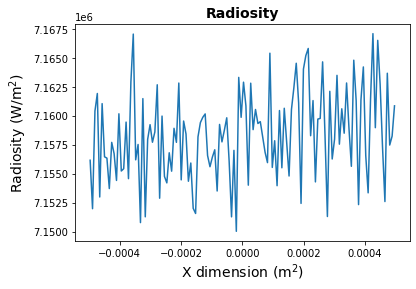

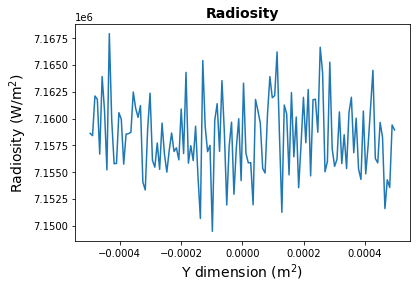

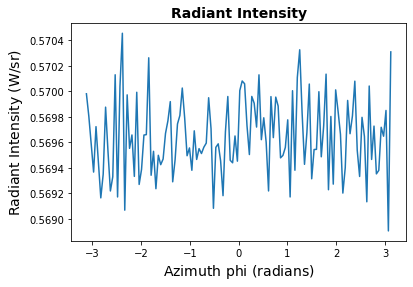

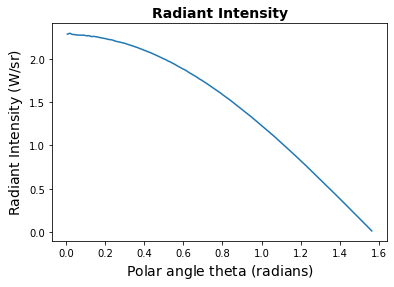

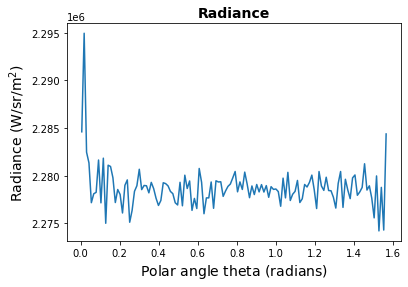

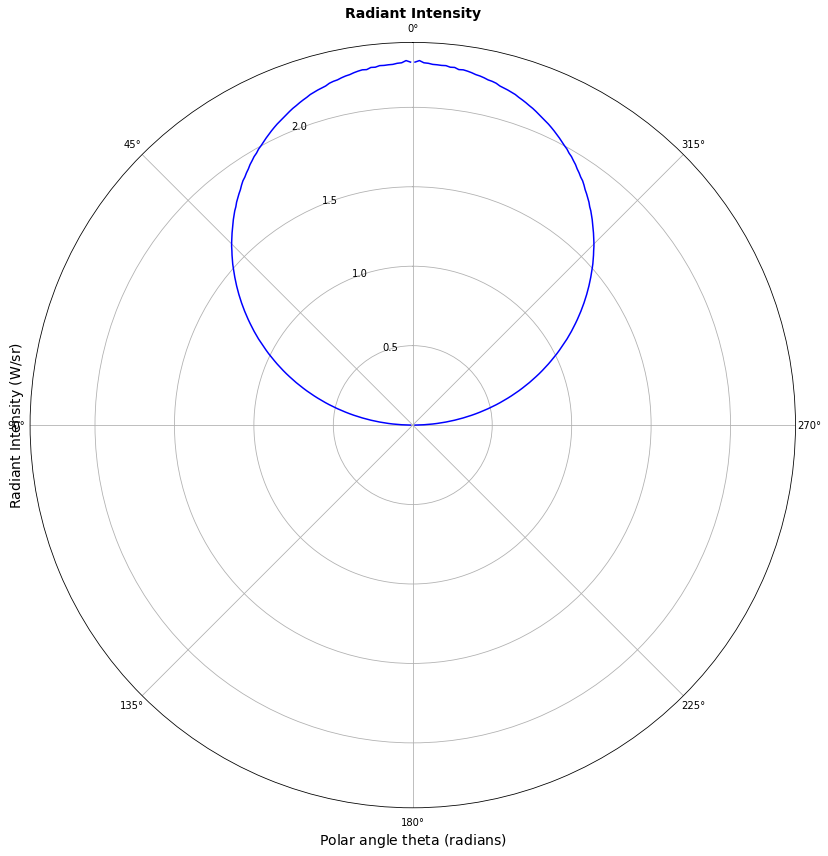

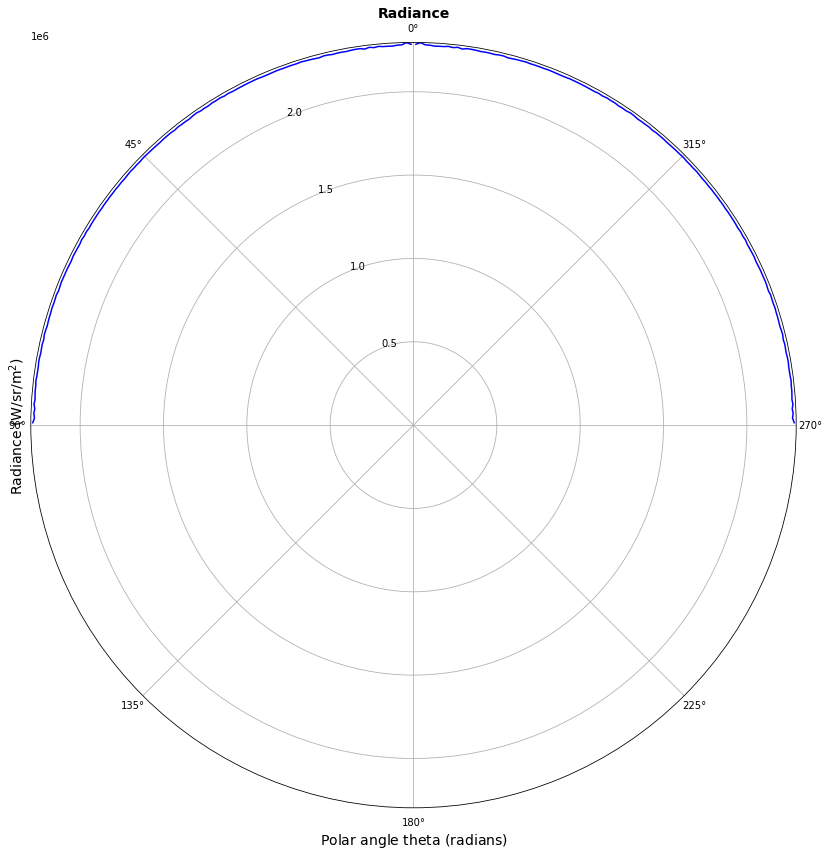

Output()

In [3]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

photon bundle count: 337991899
photon total energy (J): 0.006048672139805889


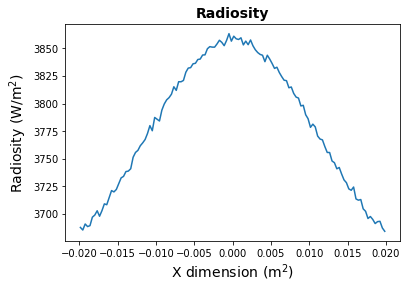

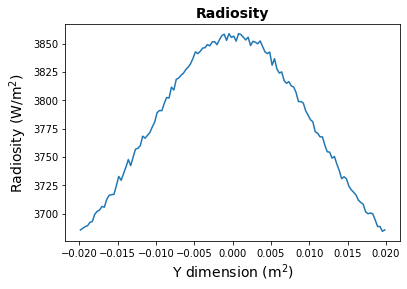

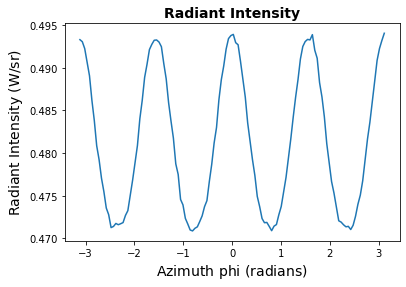

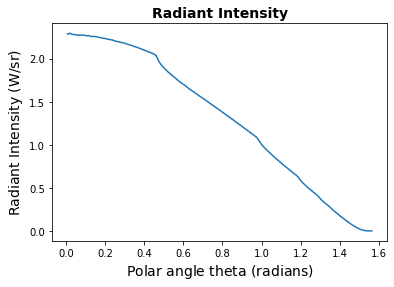

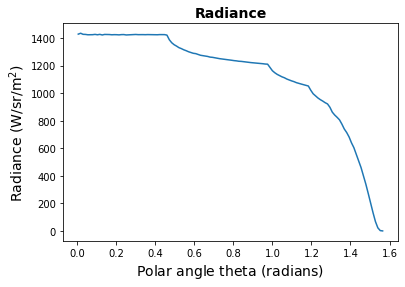

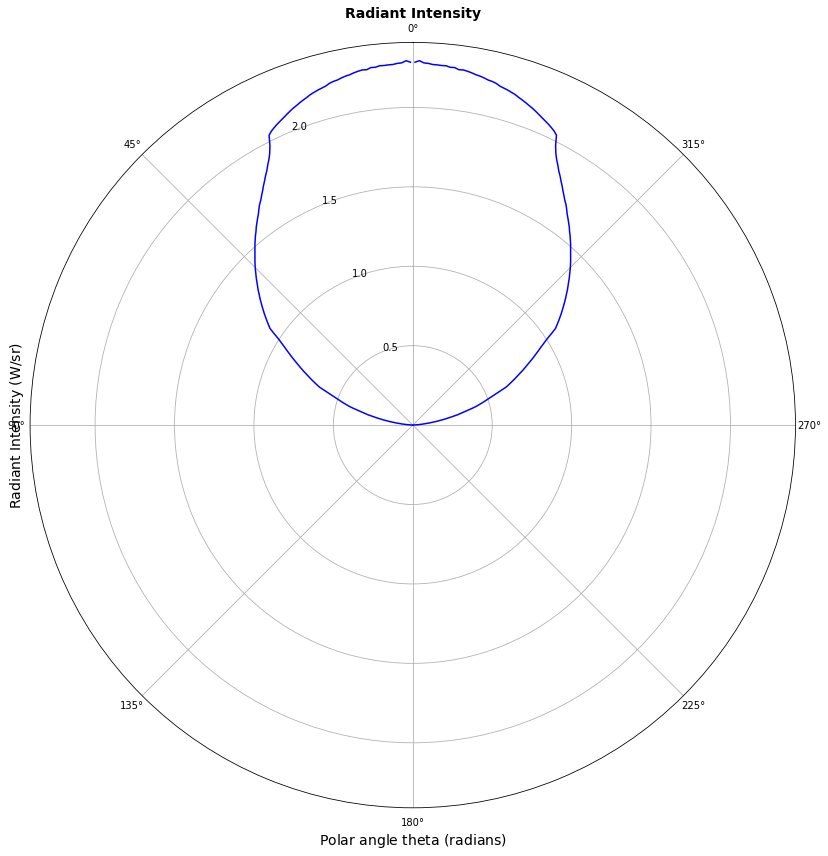

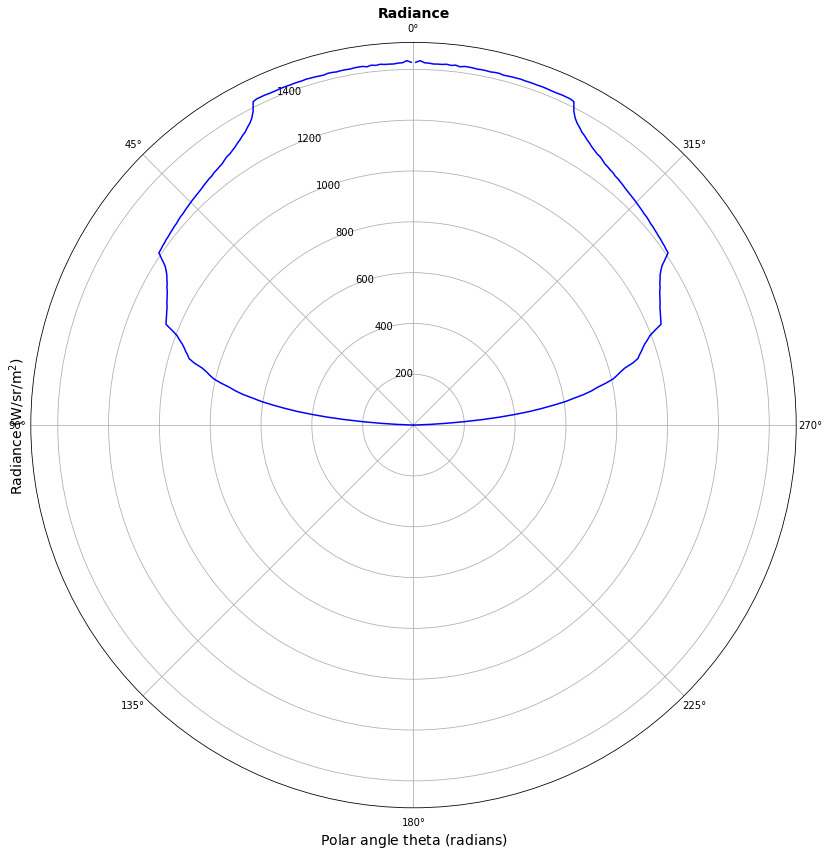

Output()

In [4]:
viz_cuda.summary(results._box_stage)
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stages_3d([results._box_stage])

photon bundle count: 255251874
photon total energy (J): 0.004567964212945122


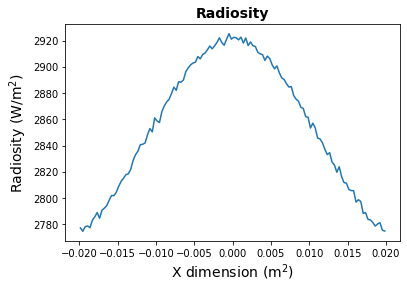

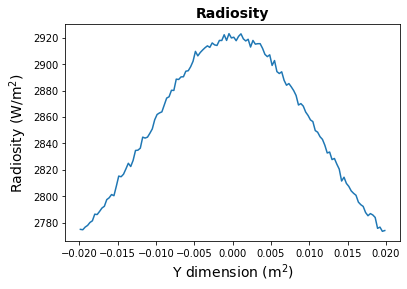

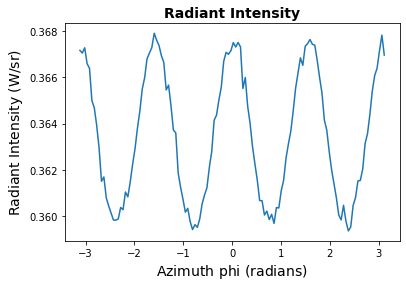

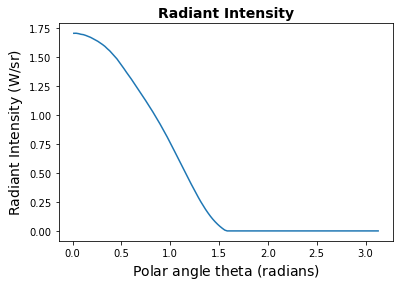

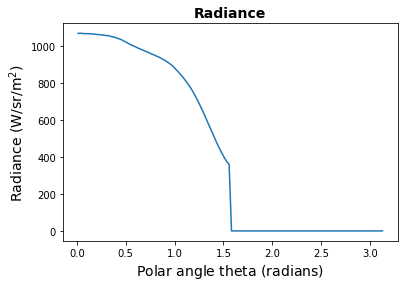

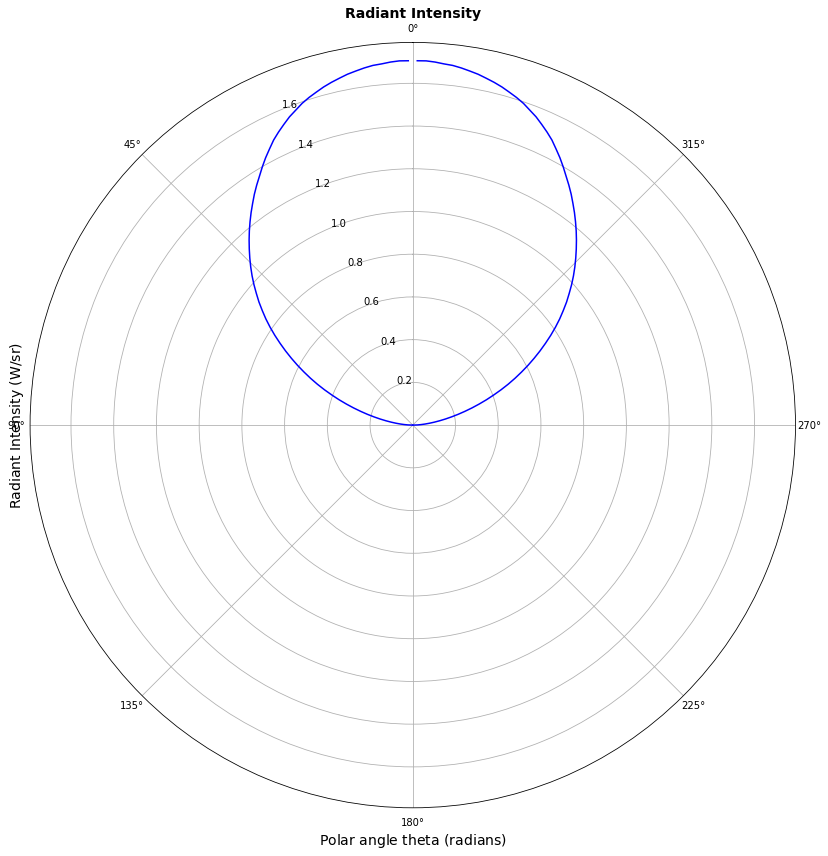

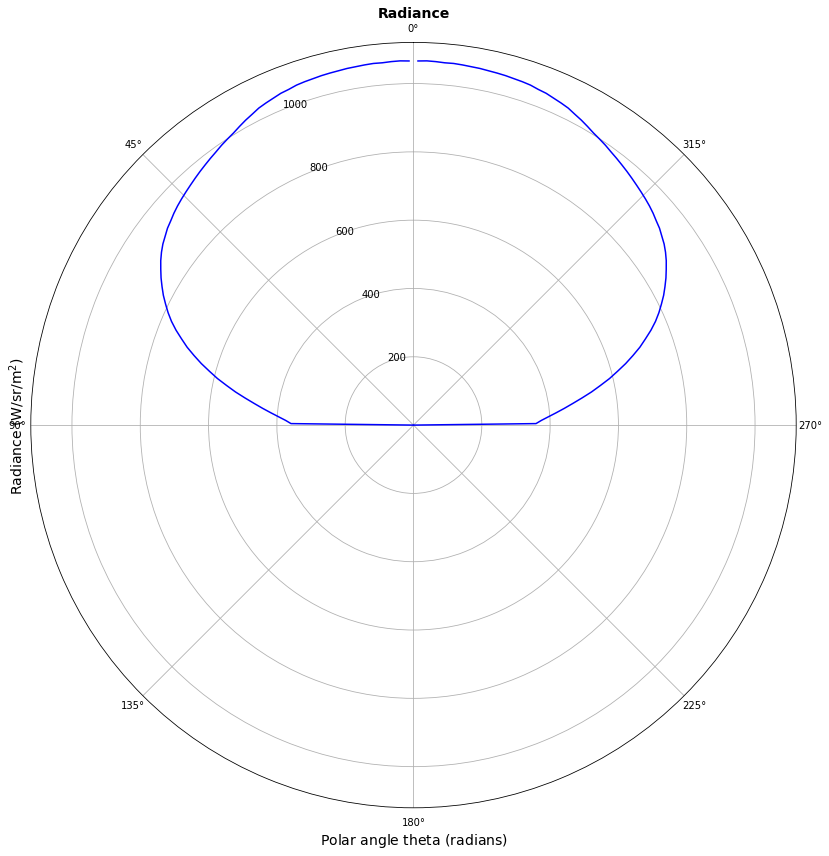

Output()

In [5]:
viz_cuda.summary(results._diffuser_stage)
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stages_3d([results._diffuser_stage])

photon bundle count: 9483
photon total energy (J): 1.6970690147156115e-07


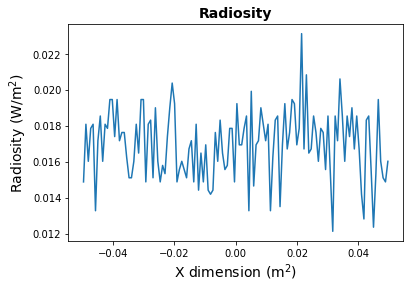

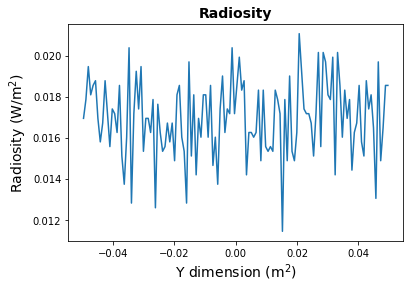

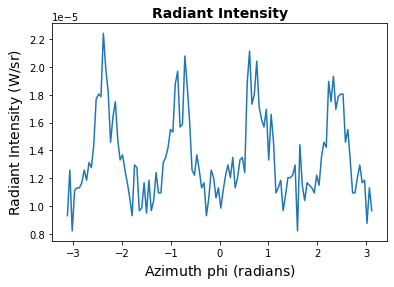

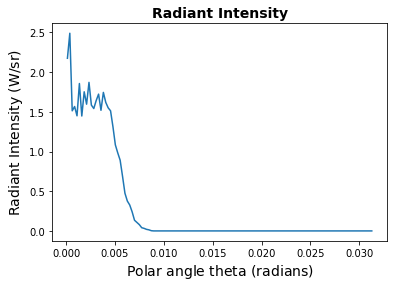

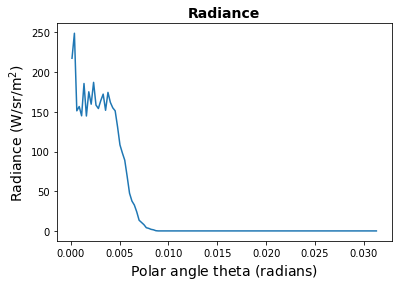

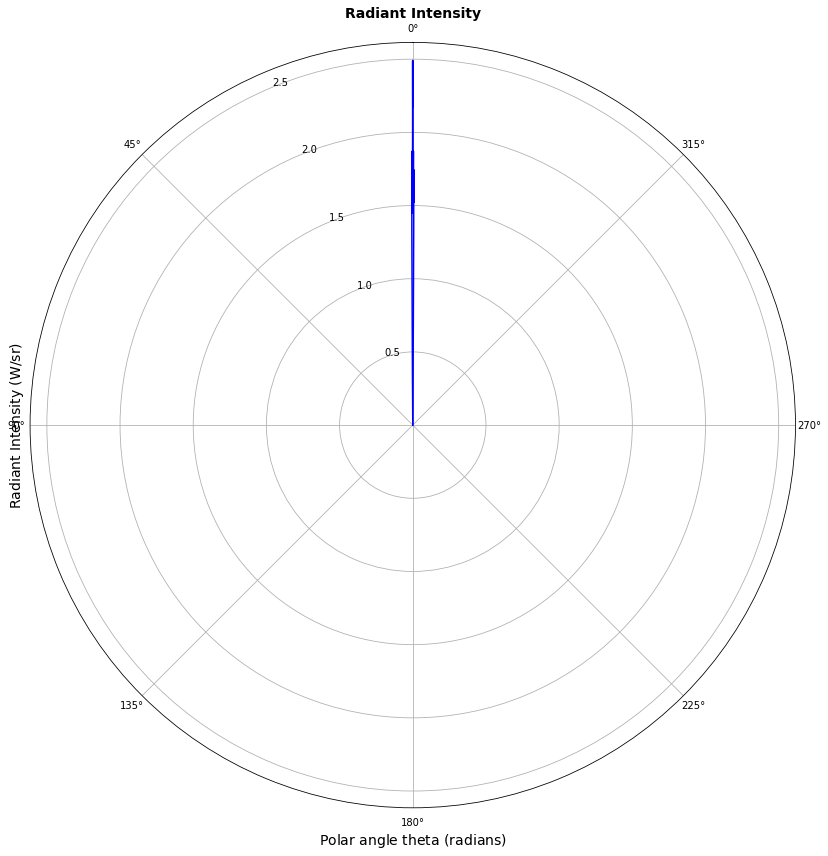

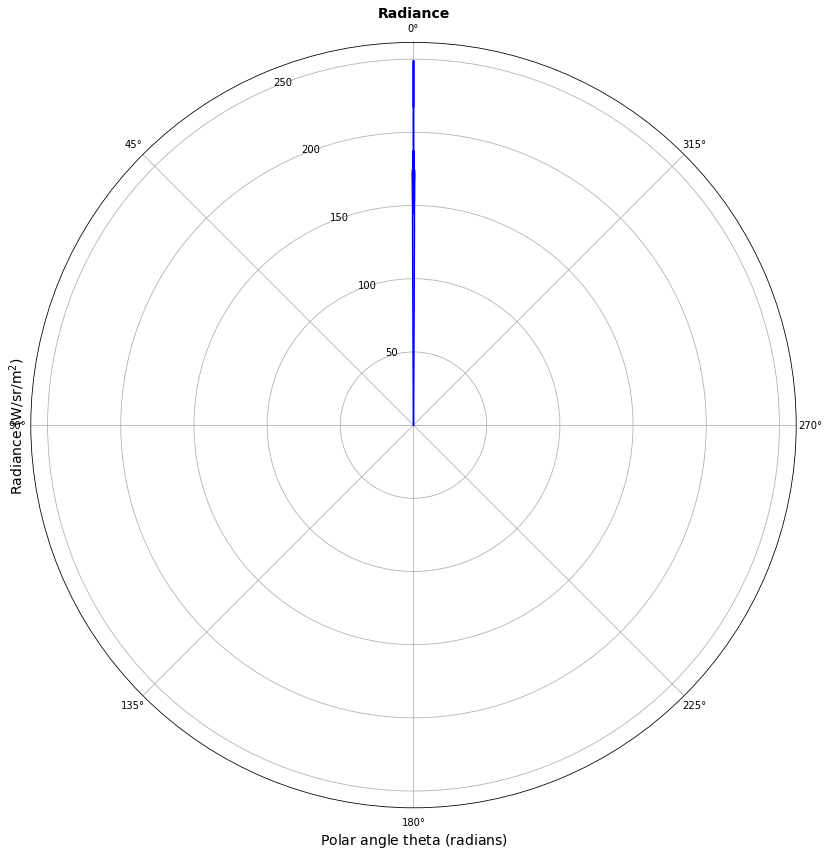

Output()

In [6]:
viz_cuda.summary(results._outbound_stage)
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stages_3d([results._outbound_stage])

photon bundle count: 9483
photon total energy (J): 1.6970690147156115e-07


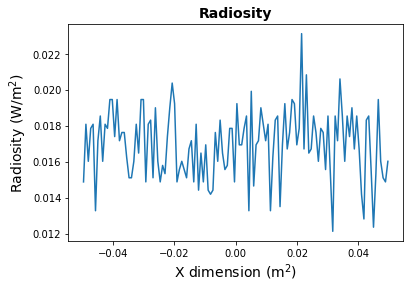

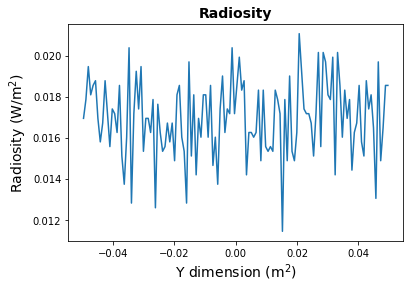

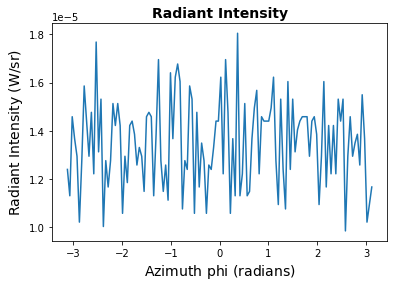

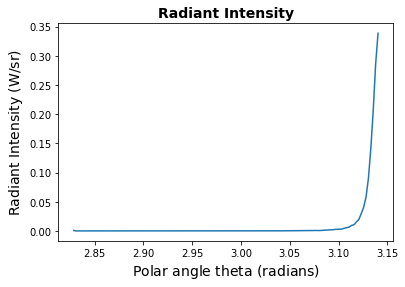

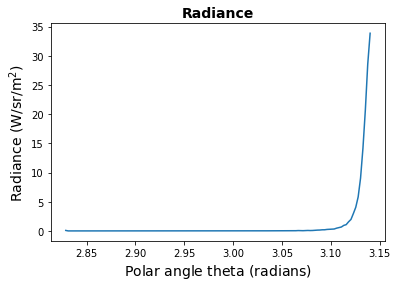

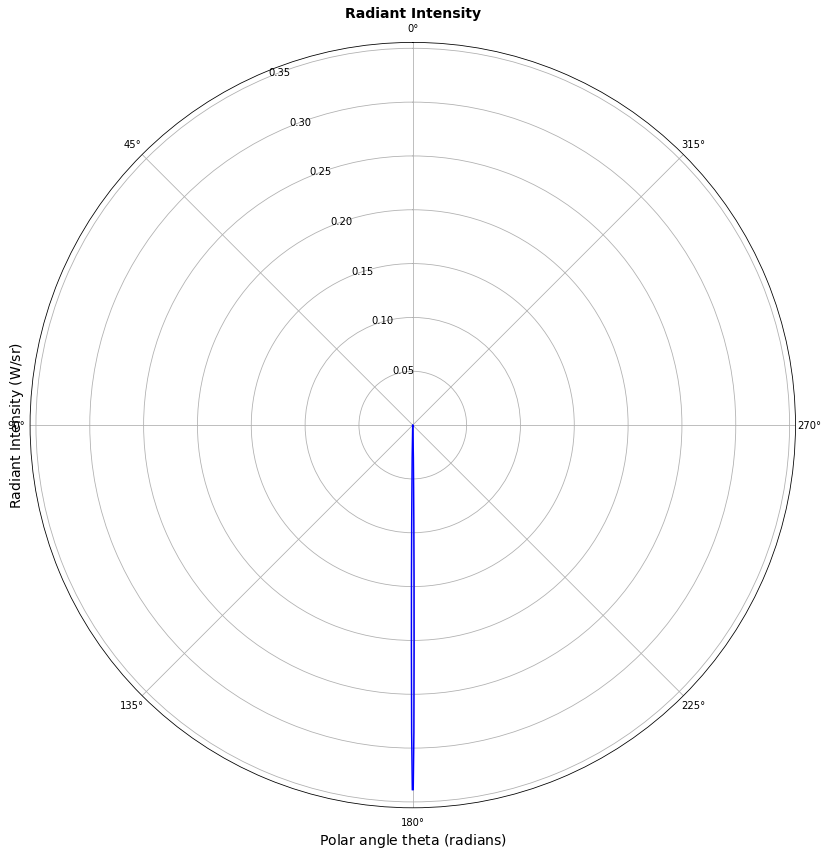

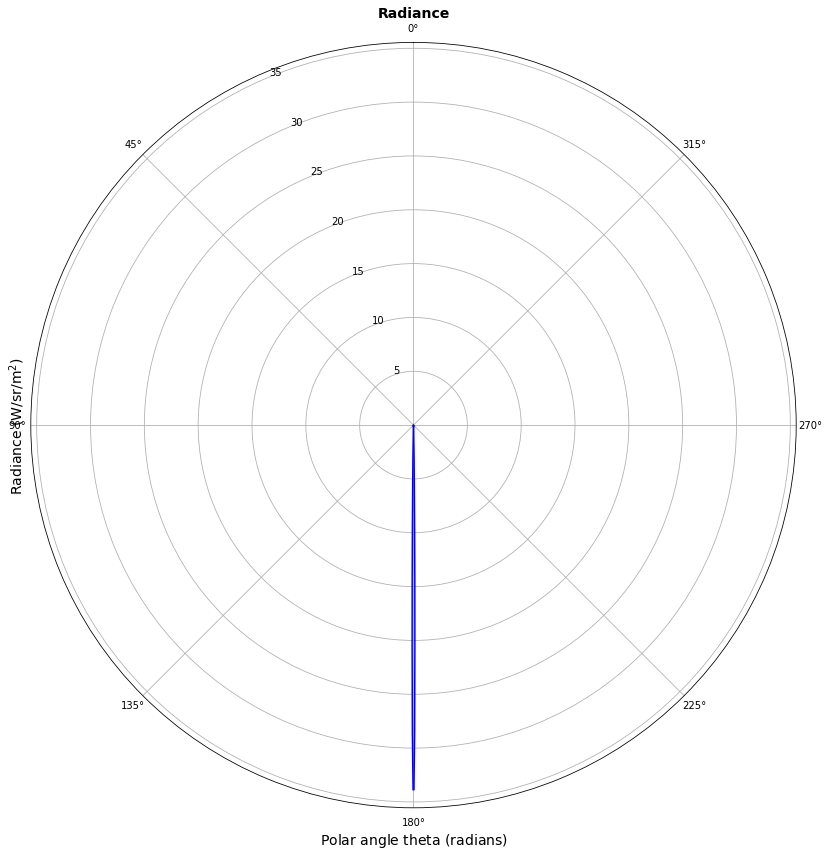

Output()

In [7]:
viz_cuda.summary(results._inbound_stage)
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stages_3d([results._inbound_stage])

photon bundle count: 4194
photon total energy (J): 7.505544076470816e-08


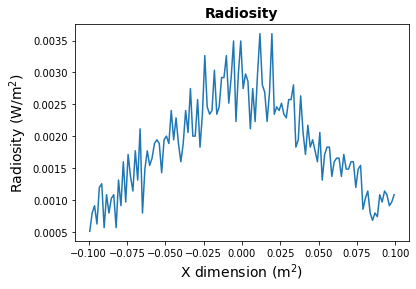

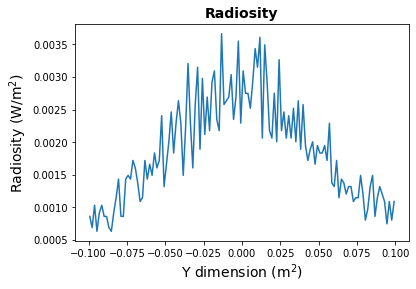

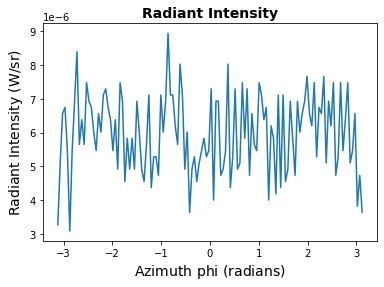

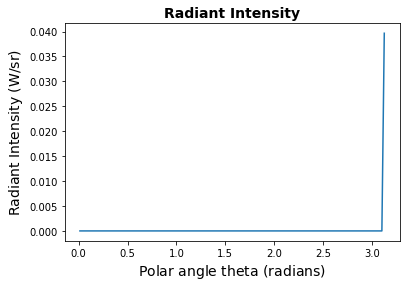

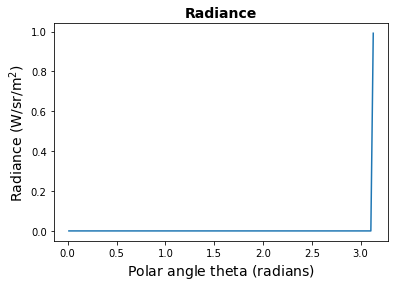

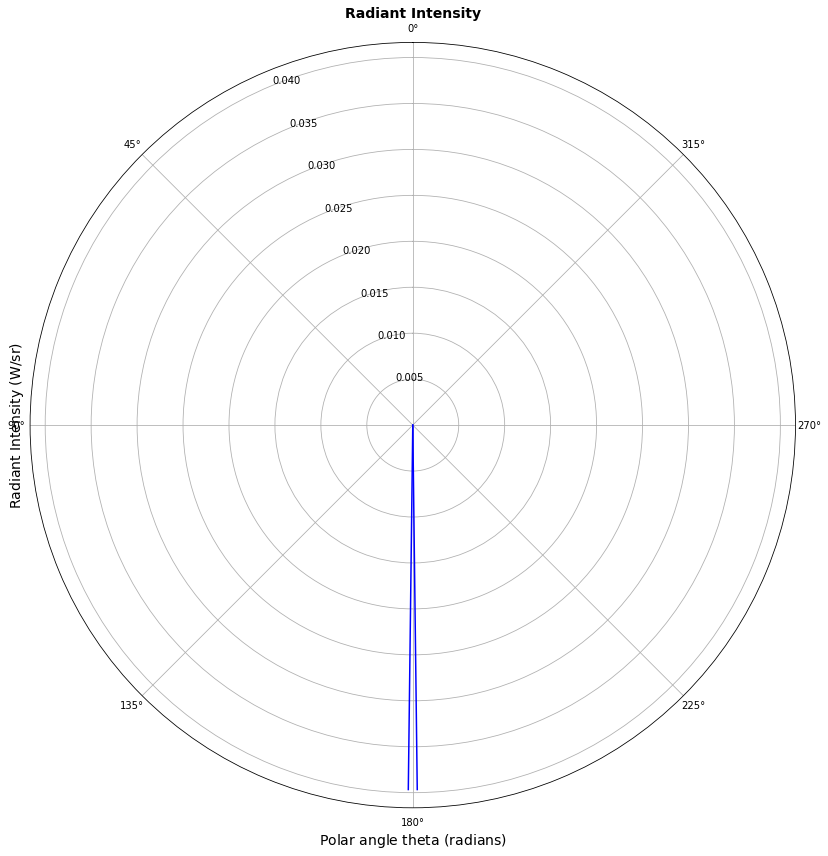

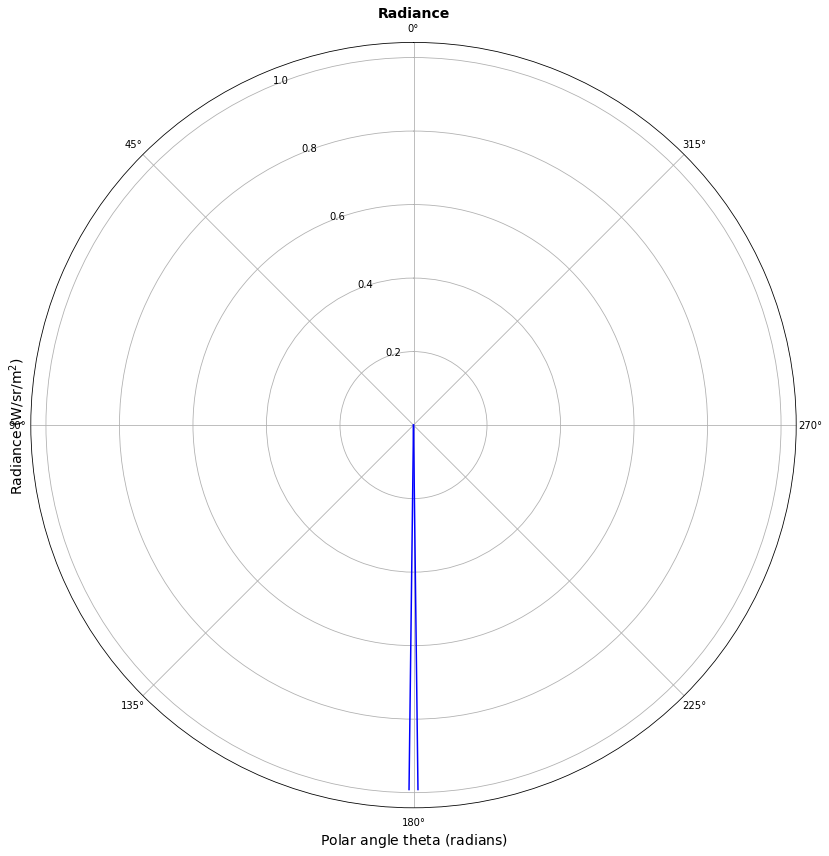

Output()

In [8]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

In [9]:
viz_cuda.plot_stages_3d([results._diffuser_stage, results._camera_plane_stage])

Output()